In [84]:
# import libraries
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from torch.utils.data import DataLoader

# Create the data and the model

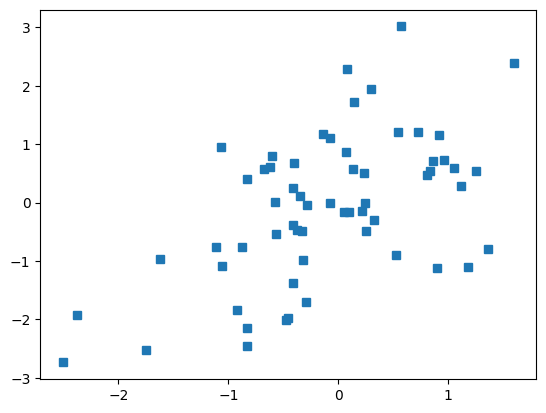

In [85]:
N = 60
x = torch.randn(N,1)
y = x + torch.randn(N,1)

# and plot
plt.plot(x,y,'s')
plt.show()

In [86]:
# build model
ANNreg = nn.Sequential(
    nn.Linear(1,1),  # input layer
    nn.ReLU(),       # activation function
    nn.Linear(1,1)   # output layer
    )

In [87]:
# model meta-parameters

learningRate = .05

# loss function
lossfun = nn.MSELoss()

# optimizer
optimizer = torch.optim.SGD(ANNreg.parameters(),lr=learningRate)

# Select data for training

In [88]:
def trainingProportion(n, trainingPercent):
  return int(round(n * trainingPercent))

# select training data (note the hard-coded N!)
trainidx  = np.random.choice(range(N),trainingProportion(N, 0.8),replace=False) # random indices
trainBool = np.zeros(N,dtype=bool) # initialize vector of Falses'
trainBool[trainidx] = True # set selected samples to True

# show the sizes
print(x[trainBool].shape)
print(x[~trainBool].shape)

torch.Size([48, 1])
torch.Size([12, 1])


# Train the model

In [89]:
numepochs = 500
for epochi in range(numepochs):

  # forward pass
  yHat = ANNreg(x[trainBool])

  # compute loss
  loss = lossfun(yHat,y[trainBool])

  # backprop
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

In [90]:
# report the losses

# compute losses of the TEST set
predYtest = ANNreg(x[~trainBool])
testloss = (predYtest-y[~trainBool]).pow(2).mean()

# print out final TRAIN loss and TEST loss
print(f'Final TRAIN loss: {loss.detach():.2f}')
print(f'Final TEST loss: {testloss.detach():.2f}')

Final TRAIN loss: 1.15
Final TEST loss: 0.99


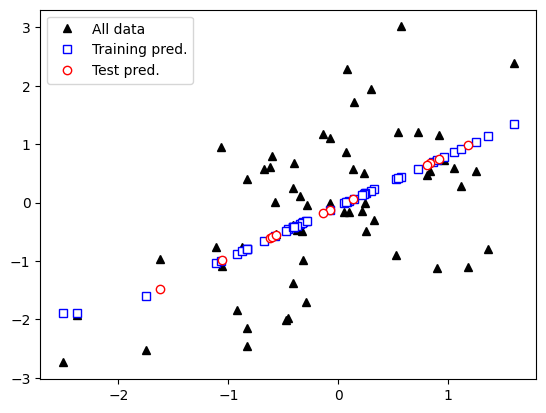

In [91]:
### plot the data

# predictions for final training run
predYtrain = ANNreg(x[trainBool]).detach().numpy()

# now plot
plt.plot(x,y,'k^',label='All data')
plt.plot(x[trainBool], predYtrain,
         'bs',markerfacecolor='w',label='Training pred.')
plt.plot(x[~trainBool],predYtest.detach(),
         'ro',markerfacecolor='w',label='Test pred.')
plt.legend()
plt.show()

# Code using DataLoader and Scikitlearn

In [92]:
# Dataset that contains the data and labels
dataSet = torch.utils.data.TensorDataset(torch.Tensor(x), torch.Tensor(y))
print(dataSet), print('')
print(dataSet.tensors)


(tensor([[-0.2917],
        [-0.5757],
        [-0.9231],
        [-1.7443],
        [-1.1140],
        [-0.8290],
        [-1.0681],
        [-0.3465],
        [ 0.0970],
        [ 0.8366],
        [ 0.5735],
        [ 0.1304],
        [ 1.1822],
        [-2.3717],
        [-1.0557],
        [ 0.3226],
        [ 0.9575],
        [ 0.2536],
        [-0.3198],
        [-0.4095],
        [-0.6201],
        [ 1.0548],
        [ 0.0500],
        [-0.0780],
        [-0.4526],
        [ 0.2993],
        [-0.0775],
        [ 0.1399],
        [-1.6210],
        [ 0.9164],
        [-0.4151],
        [-0.8762],
        [ 0.2468],
        [-0.6063],
        [ 0.7293],
        [ 0.5258],
        [ 0.8047],
        [ 1.3650],
        [ 0.2377],
        [ 1.1117],
        [ 0.8641],
        [ 0.0757],
        [ 1.5951],
        [ 0.2118],
        [-0.5623],
        [-0.4783],
        [-0.8302],
        [-2.5052],
        [-0.1424],
        [ 0.0698],
        [-0.3255],
        [ 1.2501],
        [-

In [93]:
# DataLoader
dataLdr = DataLoader(dataSet, shuffle = True)

for data,lable in dataLdr:
  print(data, lable)

tensor([[-0.4526]]) tensor([[-1.9792]])
tensor([[-0.4095]]) tensor([[-1.3793]])
tensor([[0.5258]]) tensor([[-0.8921]])
tensor([[-1.0557]]) tensor([[-1.0892]])
tensor([[-1.1140]]) tensor([[-0.7682]])
tensor([[-0.4003]]) tensor([[0.6710]])
tensor([[-0.8302]]) tensor([[0.4011]])
tensor([[-0.4151]]) tensor([[-0.3825]])
tensor([[-0.6201]]) tensor([[0.6018]])
tensor([[0.1399]]) tensor([[1.7192]])
tensor([[0.2468]]) tensor([[-0.0098]])
tensor([[-2.3717]]) tensor([[-1.9313]])
tensor([[1.3650]]) tensor([[-0.7979]])
tensor([[0.2536]]) tensor([[-0.4837]])
tensor([[-0.3198]]) tensor([[-0.9870]])
tensor([[1.1822]]) tensor([[-1.1031]])
tensor([[1.5951]]) tensor([[2.3868]])
tensor([[-1.0681]]) tensor([[0.9469]])
tensor([[0.2118]]) tensor([[-0.1413]])
tensor([[-0.8328]]) tensor([[-2.1420]])
tensor([[-0.1424]]) tensor([[1.1713]])
tensor([[-0.4158]]) tensor([[0.2442]])
tensor([[0.8047]]) tensor([[0.4753]])
tensor([[1.0548]]) tensor([[0.5933]])
tensor([[0.8641]]) tensor([[0.7056]])
tensor([[0.0698]]) ten

In [94]:
# scikitlearn to separate the data
trainData, testData, trainLabel, testLabel = train_test_split(x, y, train_size=0.8, shuffle=True)


In [95]:
numepochs = 500
for epochi in range(numepochs):

  # forward pass
  yHat = ANNreg(trainData)

  # compute loss
  loss = lossfun(yHat,trainLabel)

  # backprop
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

In [96]:
# report the losses

# compute losses of the TEST set
predYtest = ANNreg(testLabel)
testloss = (predYtest-testLabel).pow(2).mean()

# print out final TRAIN loss and TEST loss
print(f'Final TRAIN loss: {loss.detach():.2f}')
print(f'Final TEST loss: {testloss.detach():.2f}')

Final TRAIN loss: 1.13
Final TEST loss: 0.10


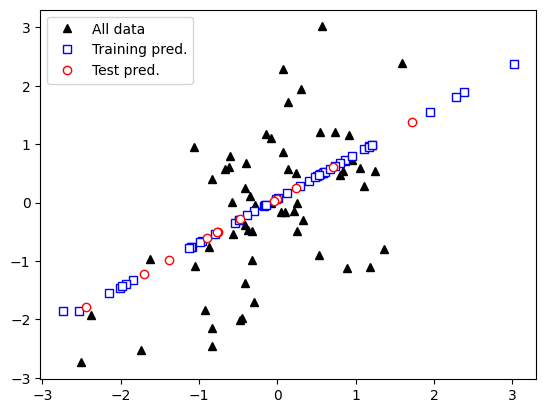

In [97]:
### plot the data

# predictions for final training run
predYtrain = ANNreg(trainLabel).detach().numpy()

# now plot
plt.plot(x,y,'k^',label='All data')
plt.plot(trainLabel, predYtrain,
         'bs',markerfacecolor='w',label='Training pred.')
plt.plot(testLabel,predYtest.detach(),
         'ro',markerfacecolor='w',label='Test pred.')
plt.legend()
plt.show()